In [144]:
''' 
Reference
1. https://sebastianraschka.com/Articles/2014_python_lda.html
2. http://goelhardik.github.io/2016/10/04/fishers-lda/ 
3. https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%99%8D%E7%B6%AD-dimension-reduction-%E7%B7%9A%E6%80%A7%E5%8D%80%E5%88%A5%E5%88%86%E6%9E%90-linear-discriminant-analysis-d4c40c4cf937

'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target

In [148]:
class MyLDA():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        label = set(y)
        mean_vectors = []
        self.sample_mean = np.mean(X, axis = 0)
        data_size = len(X[0])
        for e in label:
            mean_vectors.append(np.mean(X[y==e], axis = 0))
        
        # Calculate within class scatter
        Sw = np.zeros((data_size, data_size))
        for i, c in enumerate(label):
            Sw += (X[y==c]-mean_vectors[i]).T.dot(X[y==c]-mean_vectors[i])
        
        
        # Calculate scatter between class
        mean_vectors = np.array(mean_vectors)
        Sb = (mean_vectors - self.sample_mean).T.dot(mean_vectors - self.sample_mean)
        
        # Find eigen value of matrix (Inv(Sw)* Sb)
        self.eig_vals, self.eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
        self.eig_vecs = self.eig_vecs.T
        
        '''
        # Display eigen value/vector
        for i, v in enumerate(self.eig_vals):
            print(v, self.eig_vecs[i])
        '''
        
        self.eigen_pairs = [(np.abs(self.eig_vals[i].real), self.eig_vecs[i].real) for i in range(len(self.eig_vals))]
        self.eigen_pairs.sort(key=lambda x: x[0])
        self.eigen_pairs.reverse()
        
            
    def transform(self, X, n_components):
        self.n_components = n_components
        self.projection_matrix = []
        dim = len(X[0])
        
        for i in range(self.n_components):
            if len(self.projection_matrix) == 0:
                self.projection_matrix = self.eigen_pairs[i][1].reshape(dim,1)
            else:
                self.projection_matrix = np.hstack((self.projection_matrix, self.eigen_pairs[i][1].reshape(dim,1)))
        print(self.projection_matrix)
        return (X-self.sample_mean).dot(self.projection_matrix)  
        
        
            

[[ 0.20490976 -0.00898234]
 [ 0.38714331 -0.58899857]
 [-0.54648218  0.25428655]
 [-0.71378517 -0.76703217]]


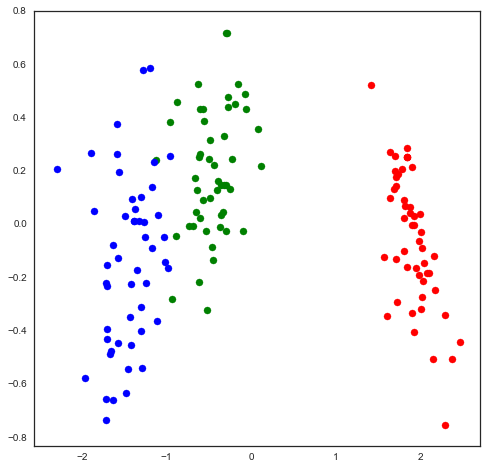

In [149]:
lda = MyLDA()
lda.fit(X,y)
X_lda = lda.transform(X,2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
colors = ['r','g','b']
for i in range(len(y)):
    ax.scatter(X_lda[i][0], X_lda[i][1], c=colors[y[i]], s=50)
plt.show()

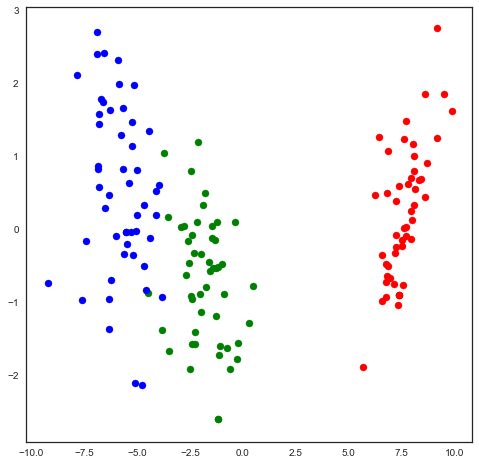

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sk_lda = LDA(n_components=2)
sk_x_lda = sk_lda.fit_transform(X,y)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
colors = ['r','g','b']
for i in range(len(y)):
    ax.scatter(sk_x_lda[i][0], sk_x_lda[i][1], c=colors[y[i]], s=50)
plt.show()